In [21]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from utils.model import VAE
from utils.dataset import OutlierDataset
from torch.utils.data import DataLoader

def collate_fn(batch):
    batch = torch.stack(batch)
    return batch.permute(1, 0, 2)

with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

## Set Device
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print(f"Using CUDA GPU: {torch.cuda.get_device_name(0)}")
elif platform.system() == "Darwin" and torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS GPU on Apple Silicon.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

model = VAE(config)
model.to(device)
model.load_state_dict(torch.load('output/423_BE1_IZ1/KFEMS.HALLA.01.DC01.IP001_202205_feeder_00_tag_IO_5SEC_MIX_423_BE1_IZ1/training_results/model_epoch_200.pt'))
model.eval()

dataset = OutlierDataset(config)
data_loader = DataLoader(dataset,batch_size=config['batch_size'],shuffle=False, drop_last=True, collate_fn=collate_fn, num_workers=4)

all_original = []
all_reconstructed = []

with torch.no_grad():
    for data_batch in data_loader:
        data_batch = data_batch.to(device)
        output_good, mu, logvar, _, _, _, _, _, _, _, _, _ = model(data_batch)

        print('data_batch shape: ', data_batch.shape)
        print('output_good shape: ', output_good.shape)
        print('mu shape: ', mu.shape)
        print('logvar shape: ', logvar.shape)


        # 데이터 처리 (CPU 변환 없이 GPU 상에서 작업)
        data_batch = data_batch.squeeze(2).transpose(0, 1).flatten()
        output_good = output_good.squeeze(2).transpose(0, 1).flatten()

        # 텐서 리스트에 추가
        all_original.append(data_batch)
        all_reconstructed.append(output_good)

# 텐서를 한 번에 결합 (GPU에서 수행)
all_original = torch.cat(all_original)
all_reconstructed = torch.cat(all_reconstructed)

# 필요시 NumPy 배열로 변환
all_original_np = all_original.cpu().numpy()
all_reconstructed_np = all_reconstructed.cpu().numpy()

Using CUDA GPU: NVIDIA GeForce RTX 3090
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])
data_batch shape:  torch.Size([150, 32, 1])
output_good shape:  torch.Size([150, 32, 1])
mu shape:  torch.Size([32, 20])
logvar shape:  torch.Size([32, 20])


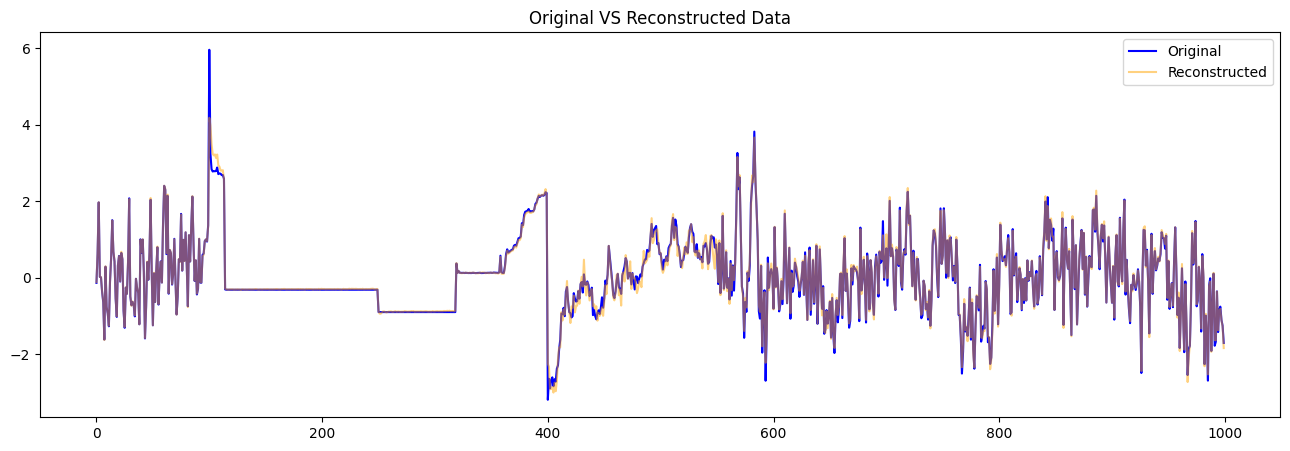

In [20]:
# Plot original vs reconstructed data for visualization
plt.figure(figsize=(16, 5))
plt.plot(all_original_np[14000:15000], label='Original', alpha=1, color='blue')
plt.plot(all_reconstructed_np[14000:15000], label='Reconstructed', alpha=0.5, color='orange')
plt.title('Original VS Reconstructed Data')
plt.legend()
plt.show()

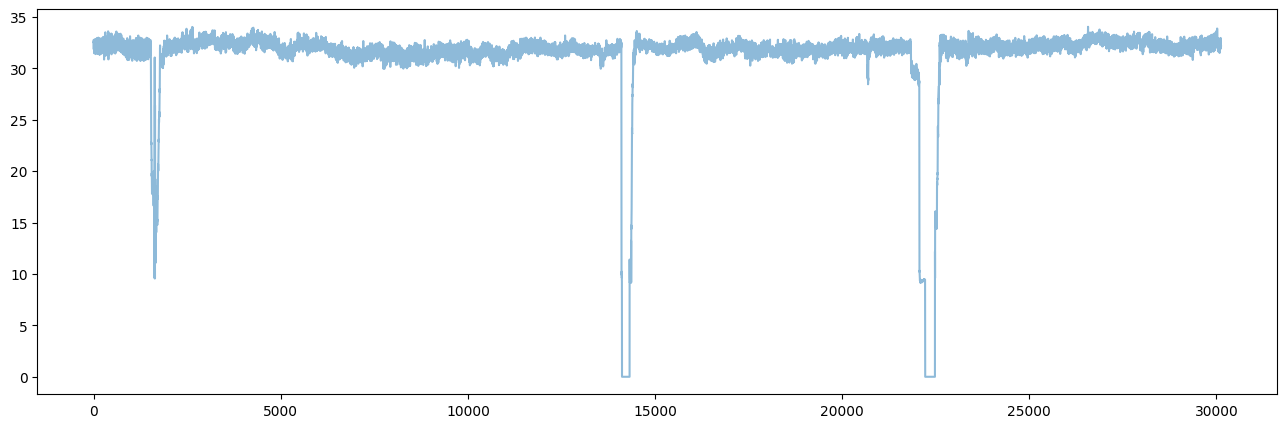

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/423_BE1_IZ1/KFEMS.HALLA.01.DC01.IP001_202205_feeder_00_tag_IO_5SEC_MIX_423_BE1_IZ1.csv', usecols=['value'])
plt.figure(figsize=(16, 5))
plt.plot(df['value'], label='Original', alpha=0.5)
plt.show()